### Loading Libraries and Data

In [185]:
#Basic needed libraries
import numpy as np
import pandas as pd

#Visualization libraries
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


#Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Model and metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [146]:
#Loading data
df = pd.read_csv("Consumo_cerveja.csv", decimal=',')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [147]:
#Change columns names
columns_name = {'Data': 'Date',
                'Temperatura Media (C)': 'Temp_Median',
                'Temperatura Minima (C)': 'Temp_Min',
                'Temperatura Maxima (C)': 'Temp_Max',
                'Precipitacao (mm)': 'Precipitation',
                'Final de Semana': 'Weekend',
                'Consumo de cerveja (litros)': 'Consumption_Liters'
                }

df.rename(columns=columns_name, inplace=True)

In [148]:
#Checking for null values
df.isnull().sum()

Date                  576
Temp_Median           576
Temp_Min              576
Temp_Max              576
Precipitation         576
Weekend               576
Consumption_Liters    576
dtype: int64

In [149]:
df[df.isnull()]

,Date,Temp_Median,Temp_Min,Temp_Max,Precipitation,Weekend,Consumption_Liters
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Dropping rows as after the year ends, there is no information provided, only null values
df =  df.dropna()
df.isna().sum()

Date                  0
Temp_Median           0
Temp_Min              0
Temp_Max              0
Precipitation         0
Weekend               0
Consumption_Liters    0
dtype: int64

In [151]:
df.dtypes

Date                   object
Temp_Median           float64
Temp_Min              float64
Temp_Max              float64
Precipitation         float64
Weekend               float64
Consumption_Liters     object
dtype: object

In [152]:
df['Consumption_Liters'] = pd.to_numeric(df['Consumption_Liters'])
df['Date'] = pd.to_datetime(df['Date'])

In [153]:
df.describe()

,Temp_Median,Temp_Min,Temp_Max,Precipitation,Weekend,Consumption_Liters
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


### Exploratory Data Analysis

##### How much beer was consumed overall on weekend and weekdays?

In [154]:
weekdays = df[df.Weekend == 0]['Consumption_Liters'].mean()
weekend = df[df.Weekend==1]['Consumption_Liters'].mean()

labels = ['Weekdays','Weekend']
values = [weekdays, weekend]
colors = ['crimson']

fig = go.Figure(data=[go.Bar(
    x=labels, y=values, marker_color= colors
)])
fig.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

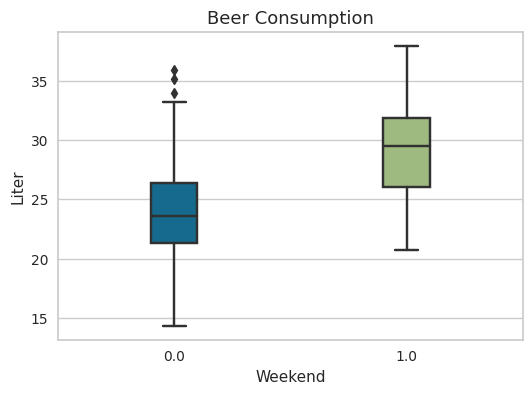

In [155]:
ax = sns.boxplot(y='Consumption_Liters', x='Weekend', data=df, width=0.2)
ax.figure.set_size_inches(6,4)
ax.set_title('Beer Consumption', fontsize=13)
ax.set_ylabel('Liter', fontsize=11)
ax.set_xlabel('Weekend', fontsize=11)

sns.set_palette('Accent')

##### How much beer was consumed on an average for each day?

In [156]:
#Extracting day and month from the datetime object:

df['Months'] = df['Date'].apply(lambda x: x.strftime('%B'))
df['Day'] = df['Date'].apply(lambda x: x.strftime('%A'))
df.head()

,Date,Temp_Median,Temp_Min,Temp_Max,Precipitation,Weekend,Consumption_Liters,Months,Day
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,January,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,January,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,January,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,January,Sunday
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,January,Monday


In [157]:
fig = px.box(df, x="Day", y="Consumption_Liters", color="Day", orientation='v', notched=True, title = 'Beer Consumption by day of the week' )

fig.show()

##### How much beer was consumed each month?

In [158]:
fig = px.box(df, x="Months", y="Consumption_Liters", color="Months", orientation='v', notched=True, title = 'Beer Consumption by Months of the year' )

fig.show()

##### How was the temperature for the year?

In [159]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['Temp_Min'], name='Minimum Temperature',
                         line=dict(color='royalblue', width=2)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Temp_Max'], name = 'Max Temperature',
                         line=dict(color='crimson', width=2)))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Temp_Median'], name='Median Temperature',
                         line=dict(color='orange', width=2) 
))


# Edit the layout
fig.update_layout(title='Temperature throughout Brazil',
                   xaxis_title='Dates',
                   yaxis_title='Temperature (degrees C)')


fig.show()

##### How much beer was consumed each season?

In [160]:
seasons_map = {
    'January': 'Summer',
    'February': 'Summer',
    'March': 'Summer',
    'April': 'Autumn',
    'May': 'Autumn',
    'June': 'Winter',
    'July': 'Winter',
    'August': 'Winter',
    'September': 'Winter',
    'October': 'Spring',
    'November': 'Spring',
    'December': 'Summer'   
}

df['Season'] = df['Months'].apply(lambda x: seasons_map[x])

In [161]:
fig = px.box(df, x="Season", y="Consumption_Liters", color="Season", orientation='v', notched=True, title = 'Beer Consumption by Seasons of the year' )

fig.show()

##### How is the rainfall for the year?

In [162]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df['Date'], y=df['Precipitation'], name='Rainfall for the year',
                         line=dict(color='blue', width=2)))



# Edit the layout
fig.update_layout(title='Rainfall throughout Brazil',
                   xaxis_title='Dates',
                   yaxis_title='Precipitation')


fig.show()

##### Pearson Correlation

In [163]:
df.corr()

/tmp/ipykernel_358/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Temp_Median,Temp_Min,Temp_Max,Precipitation,Weekend,Consumption_Liters
Temp_Median,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temp_Min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temp_Max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumption_Liters,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


/tmp/ipykernel_358/2174514471.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bi

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

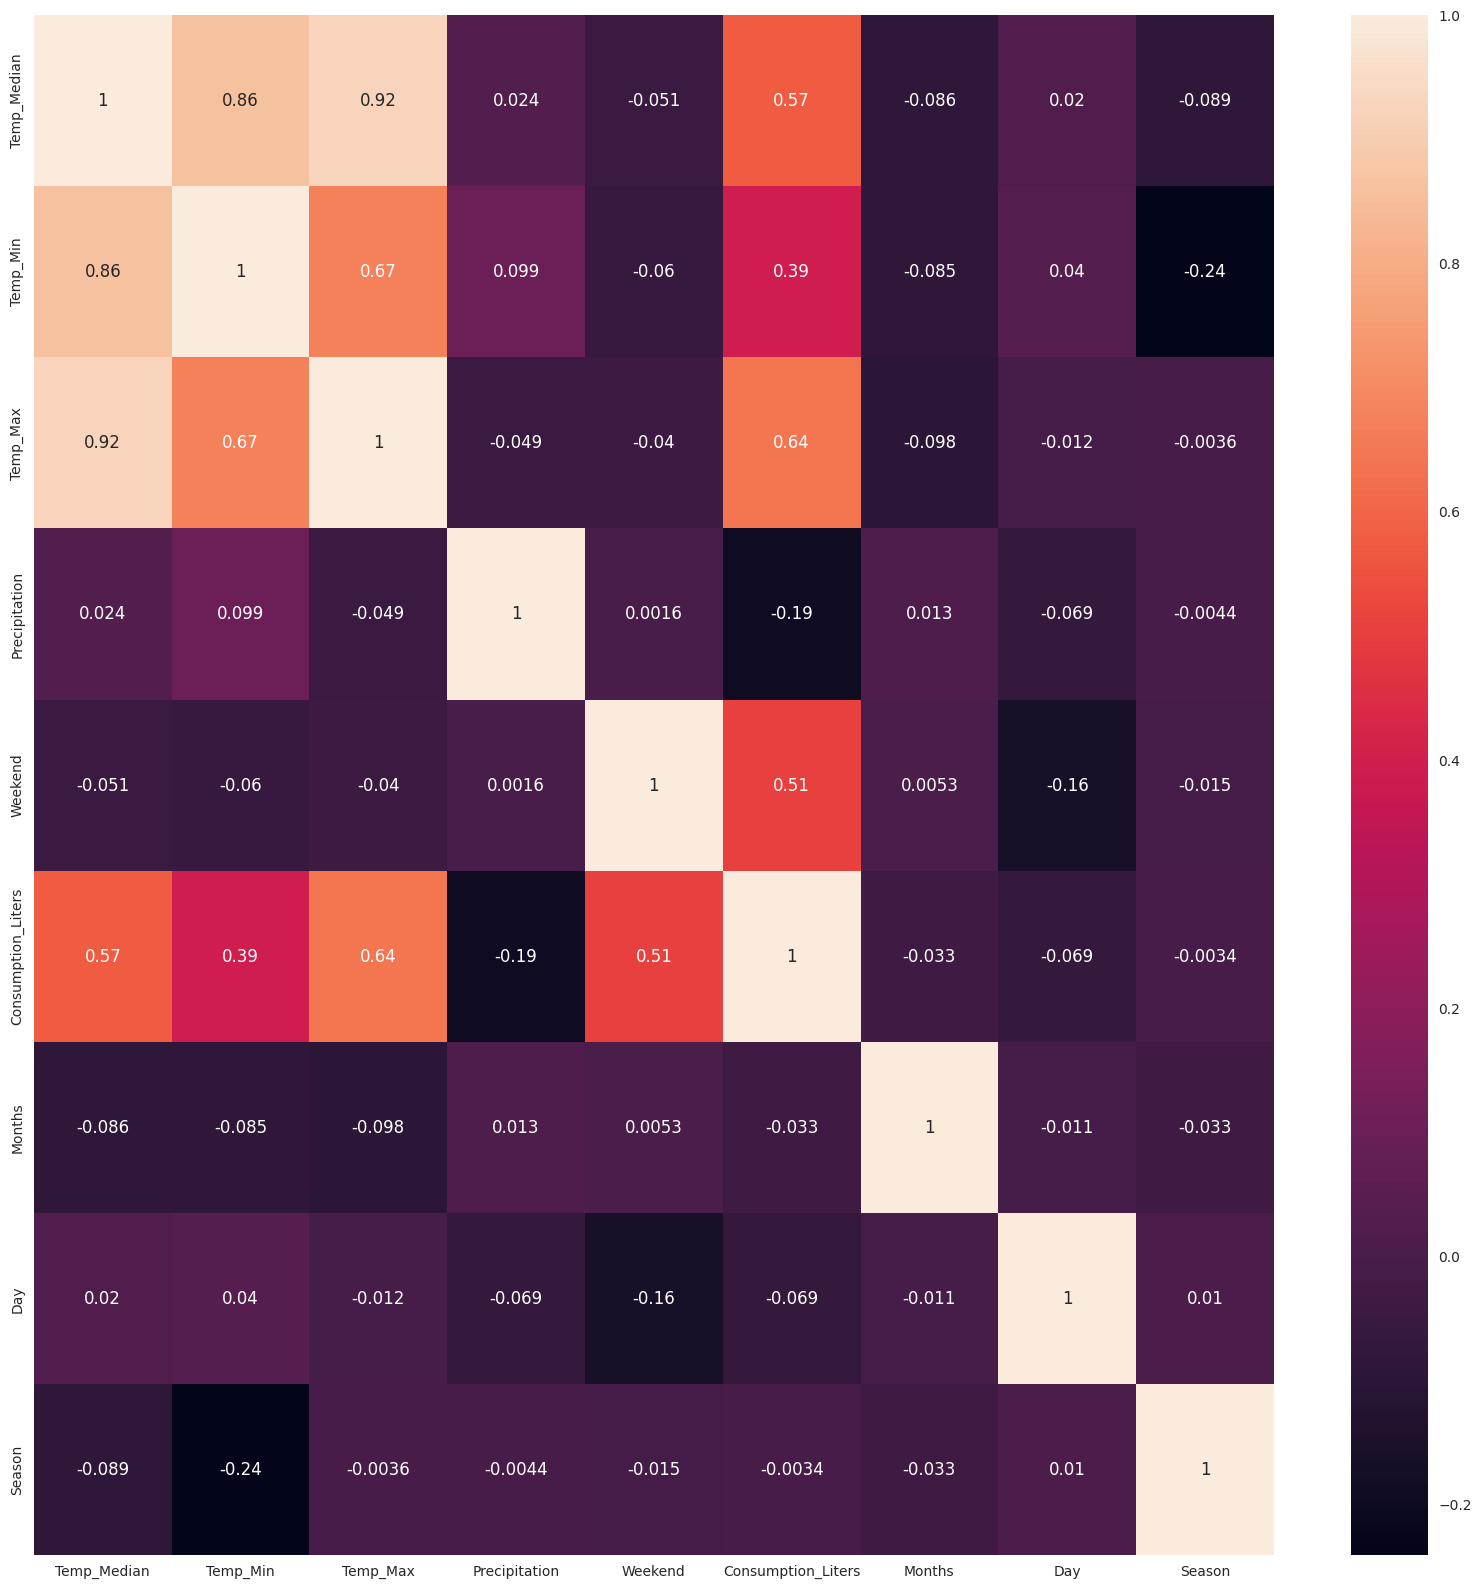

In [186]:
figure_corr = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

#### Preparing Data

##### Encoding categorical variables into numerical data for calculation

In [164]:
label_encoder = LabelEncoder()

df['Months'] = label_encoder.fit_transform(df['Months'])
df['Day'] = label_encoder.fit_transform(df['Day'])
df['Season'] = label_encoder.fit_transform(df['Season'])

In [165]:
df

,Date,Temp_Median,Temp_Min,Temp_Max,Precipitation,Weekend,Consumption_Liters,Months,Day,Season
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,4,4,2
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,4,0,2
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,4,2,2
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,4,3,2
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,4,1,2
...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,2,3,2
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,2,1,2
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,2,5,2
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,2,6,2


##### Dividing the data into train and test

In [166]:
X, y = df.drop(columns=['Date', 'Consumption_Liters', 'Temp_Median', 'Temp_Min', 'Months', 'Day', 'Season'], axis=1), df['Consumption_Liters']

In [167]:
X.shape, y.shape

((365, 3), (365,))

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model

In [169]:
model = LinearRegression()

In [170]:
model.fit(X_train, y_train)

LinearRegression()

In [171]:
print('R² = {}'.format(model.score(X_train, y_train)))

R² = 0.7051672701607923


In [172]:
y_predicted = model.predict(X_test)

In [173]:
print('R² = {}'.format(metrics.r2_score(y_true=y_test, y_pred=y_predicted)))

R² = 0.7487244453450828


In [174]:
#intercept
model.intercept_

6.396174228697248

In [175]:
#angular coeficients
model.coef_

array([ 0.66752499, -0.05305718,  5.33497184])

In [176]:
graph = px.scatter(x=X_train['Temp_Max'], y=y_train)
graph.add_scatter(x=X_train['Temp_Max'], y=y_test, name ='Precisoes')
graph.show()

/home/marcela/.virtualenvs/beer-consumption/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'san

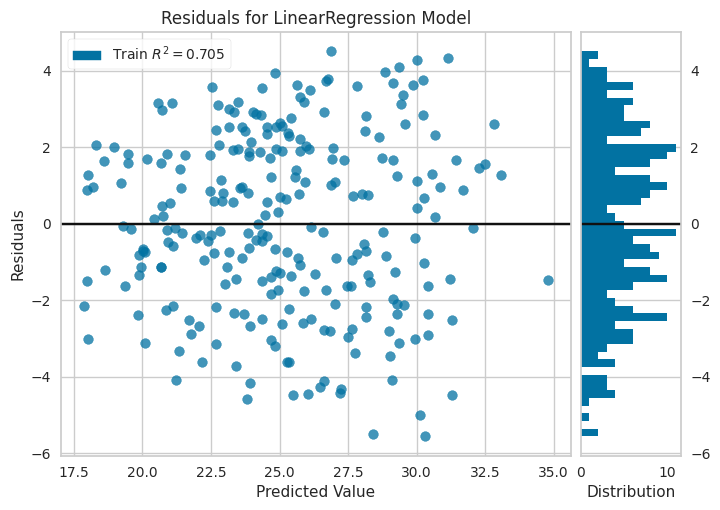

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [178]:
from yellowbrick.regressor import ResidualsPlot
visualization = ResidualsPlot(model)
visualization.fit(X_train, y_train)
visualization.poof()